# Mechanic parts defect detection

This project inspired by my Current occupation

In the manufacuring industials. The defects might accidentally occur during production
In this project is defect classification from images particularly. Because, There are some defects could validate by images.

This dataset come from [Mechanic Component Images ( Normal / Defected)](https://www.kaggle.com/satishpaladi11/mechanic-component-images-normal-defected) from Kaggle.com


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import cv2
import random
import opendatasets as od ##Library for import dataset
%matplotlib inline

## Download dataset 

In [2]:
od.download('https://www.kaggle.com/satishpaladi11/mechanic-component-images-normal-defected')

100%|█████████████████████████████████████████████████████████████████████████████| 4.60M/4.60M [00:00<00:00, 7.98MB/s]

In [3]:
base_path = './mechanic-component-images-normal-defected'

## Checking for each dataset. How many each image data belong with?

Imabalance dataset affect to machine learning performane directly. You should observe label of each classes to ensure you able to make prediction with exists images

In [23]:
print(f"There are {len(os.listdir(base_path))} type of dataset")

There are 3 type of dataset


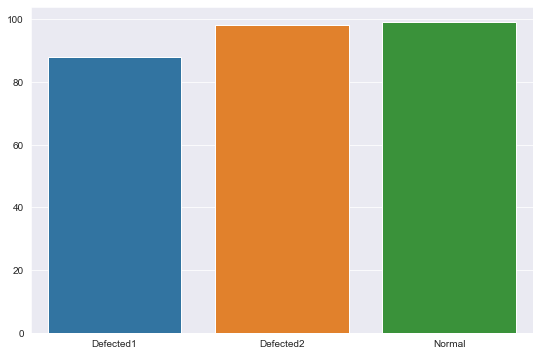

In [24]:
data_set = []
amount_of_each = []
for folder in os.listdir(base_path):
    data_set.append(folder)
    amount_of_each.append(len(os.listdir(os.path.join(base_path,folder))))
    
plt.figure(figsize=(9,6))
sns.set_style('darkgrid')
sns.barplot(x = data_set,y = amount_of_each)

## Visualize each type of dataset

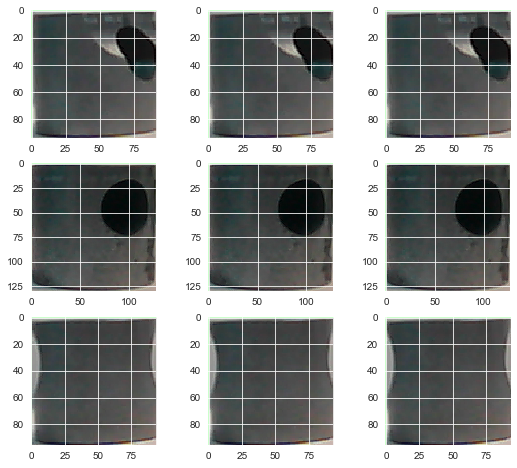

In [25]:
fig,ax = plt.subplots(3,3,figsize=(9,8))
for i in range(3):
    file_name = random.choice(os.listdir(os.path.join(base_path,data_set[i])))
    folder = os.path.join(base_path,data_set[i])
    for j in range(3):
        img = cv2.imread(os.path.join(folder,file_name))
        ax[i,j].imshow(img)

## Import Tensorflow 

In [7]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense,Flatten,Dropout
from tensorflow.keras.optimizers import RMSprop,Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16,ResNet50,EfficientNetB6
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint
import tensorflow as tf
tf.config.list_physical_devices('GPU') 

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

## Create model by using Resnet pretrained model and make prediction

In [8]:
resnet = ResNet50(include_top=False,input_shape=(80,80,3))
for layer in resnet.layers:
    layer.trainable = False
flat = Flatten()((resnet.layers[-1].output))
dense1 = Dense(1024,activation='relu')(flat)
dense2 = Dense(512,activation='relu')(dense1)
drop = Dropout(0.2)(dense2)
model_output = Dense(3,activation = 'softmax')(drop)
model = Model(resnet.input,model_output)
# model.summary()

94773248/94765736 [==============================] - ETA:  - ETA: 1: - ETA: 1: - ETA: 45s - ETA: 21 - ETA: 15 - ETA: 8 - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA: 10 - ETA: 10 - ETA: 10 - ETA: 10 - ETA: 10 - ETA: 10 - ETA: 10 - ETA: 10 - ETA: 10 - ETA: 10 - ETA: 10 - ETA: 10 - ETA: 10 - ETA: 10 - ETA: 10 - ETA: 11 - ETA: 10 - ETA: 11 - ETA: 11 - ETA: 11 - ETA: 11 - ETA: 11 - ETA: 11 - ETA: 10 - ETA: 10 - ETA: 10 - ETA: 10 - ETA: 10 - ETA: 10 - ETA: 10 - ETA: 10 - ETA: 10 - ETA: 10 - ETA: 9 - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:

In [26]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 80, 80, 3)]  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 86, 86, 3)    0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 40, 40, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 40, 40, 64)   256         conv1_conv[0][0]                 
______________________________________________________________________________________________

conv2_block3_out (Activation)   (None, 20, 20, 256)  0           conv2_block3_add[0][0]           
__________________________________________________________________________________________________
conv3_block1_1_conv (Conv2D)    (None, 10, 10, 128)  32896       conv2_block3_out[0][0]           
__________________________________________________________________________________________________
conv3_block1_1_bn (BatchNormali (None, 10, 10, 128)  512         conv3_block1_1_conv[0][0]        
__________________________________________________________________________________________________
conv3_block1_1_relu (Activation (None, 10, 10, 128)  0           conv3_block1_1_bn[0][0]          
__________________________________________________________________________________________________
conv3_block1_2_conv (Conv2D)    (None, 10, 10, 128)  147584      conv3_block1_1_relu[0][0]        
__________________________________________________________________________________________________
conv3_bloc

__________________________________________________________________________________________________
conv3_block4_3_bn (BatchNormali (None, 10, 10, 512)  2048        conv3_block4_3_conv[0][0]        
__________________________________________________________________________________________________
conv3_block4_add (Add)          (None, 10, 10, 512)  0           conv3_block3_out[0][0]           
                                                                 conv3_block4_3_bn[0][0]          
__________________________________________________________________________________________________
conv3_block4_out (Activation)   (None, 10, 10, 512)  0           conv3_block4_add[0][0]           
__________________________________________________________________________________________________
conv4_block1_1_conv (Conv2D)    (None, 5, 5, 256)    131328      conv3_block4_out[0][0]           
__________________________________________________________________________________________________
conv4_bloc

__________________________________________________________________________________________________
conv4_block4_2_bn (BatchNormali (None, 5, 5, 256)    1024        conv4_block4_2_conv[0][0]        
__________________________________________________________________________________________________
conv4_block4_2_relu (Activation (None, 5, 5, 256)    0           conv4_block4_2_bn[0][0]          
__________________________________________________________________________________________________
conv4_block4_3_conv (Conv2D)    (None, 5, 5, 1024)   263168      conv4_block4_2_relu[0][0]        
__________________________________________________________________________________________________
conv4_block4_3_bn (BatchNormali (None, 5, 5, 1024)   4096        conv4_block4_3_conv[0][0]        
__________________________________________________________________________________________________
conv4_block4_add (Add)          (None, 5, 5, 1024)   0           conv4_block3_out[0][0]           
          

__________________________________________________________________________________________________
conv5_block2_1_bn (BatchNormali (None, 3, 3, 512)    2048        conv5_block2_1_conv[0][0]        
__________________________________________________________________________________________________
conv5_block2_1_relu (Activation (None, 3, 3, 512)    0           conv5_block2_1_bn[0][0]          
__________________________________________________________________________________________________
conv5_block2_2_conv (Conv2D)    (None, 3, 3, 512)    2359808     conv5_block2_1_relu[0][0]        
__________________________________________________________________________________________________
conv5_block2_2_bn (BatchNormali (None, 3, 3, 512)    2048        conv5_block2_2_conv[0][0]        
__________________________________________________________________________________________________
conv5_block2_2_relu (Activation (None, 3, 3, 512)    0           conv5_block2_2_bn[0][0]          
__________

In [9]:
callback = ModelCheckpoint('./checkpoint.ckt',save_weights_only=True,
    monitor='val_accuracy',
    mode='max',)
earlystop = EarlyStopping(monitor='val_accuracy',patience=15,mode='max',restore_best_weights=True)
model.compile(optimizer=RMSprop(learning_rate=0.001),loss = 'categorical_crossentropy',metrics=['accuracy'])

In [10]:
data_gen = ImageDataGenerator(brightness_range=[1.5,2.5],
                              rotation_range = 0.6,validation_split=0.3)

In [11]:
train_data = data_gen.flow_from_directory(base_path,target_size=(80,80),subset='training')
valid_data = data_gen.flow_from_directory(base_path,target_size=(80,80),subset='validation')

Found 201 images belonging to 3 classes.
Found 84 images belonging to 3 classes.


In [13]:
history= model.fit(train_data,epochs=8,validation_data=valid_data,callbacks=[callback])

Epoch 1/8
7/7 [==============================] - ETA: 2s - loss: 0.1037 - accuracy: 0.96 - ETA: 0s - loss: 0.0518 - accuracy: 0.98 - ETA: 0s - loss: 0.0351 - accuracy: 0.98 - ETA: 0s - loss: 0.0321 - accuracy: 0.99 - ETA: 0s - loss: 0.0246 - accuracy: 0.99 - ETA: 0s - loss: 0.0199 - accuracy: 0.99 - ETA: 0s - loss: 0.0168 - accuracy: 0.99 - 4s 559ms/step - loss: 0.0168 - accuracy: 0.9950 - val_loss: 1.4697 - val_accuracy: 0.7738
Epoch 2/8
7/7 [==============================] - ETA: 0s - loss: 4.2354e-06 - accuracy: 1.00 - ETA: 0s - loss: 3.2664e-05 - accuracy: 1.00 - ETA: 0s - loss: 2.1788e-05 - accuracy: 1.00 - ETA: 0s - loss: 2.4293e-05 - accuracy: 1.00 - ETA: 0s - loss: 1.8915e-05 - accuracy: 1.00 - ETA: 0s - loss: 1.5409e-05 - accuracy: 1.00 - ETA: 0s - loss: 1.5936e-05 - accuracy: 1.00 - 1s 149ms/step - loss: 1.5936e-05 - accuracy: 1.0000 - val_loss: 0.7061 - val_accuracy: 0.8690
Epoch 3/8
7/7 [==============================] - ETA: 0s - loss: 4.4703e-08 - accuracy: 1.00 - ETA: 0s

In [ ]:
model.save(defec)